In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
debussy_file = "audio/debussy.wav"
duke_file = "audio/duke.wav"
redhot_file = "audio/redhot.wav"

In [6]:
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [7]:
sr

22050

### EXTRACTING SHORT TIME FOURIER TRANSOFORM

In [8]:
# convert signal to short time fourier transform
FRAME_SIZE = 2048
HOP_SIZE = 512

stft_debussy = librosa.stft(debussy,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)

In [10]:
stft_debussy.shape

(1025, 1292)

### Calculating the spectogram

In [11]:
# stft contains complex numbers and we are interested in the real amplitude values.

Y_debussy = np.abs(stft_debussy) ** 2

### Visualizing the spectogram

In [28]:
def plot_spectogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

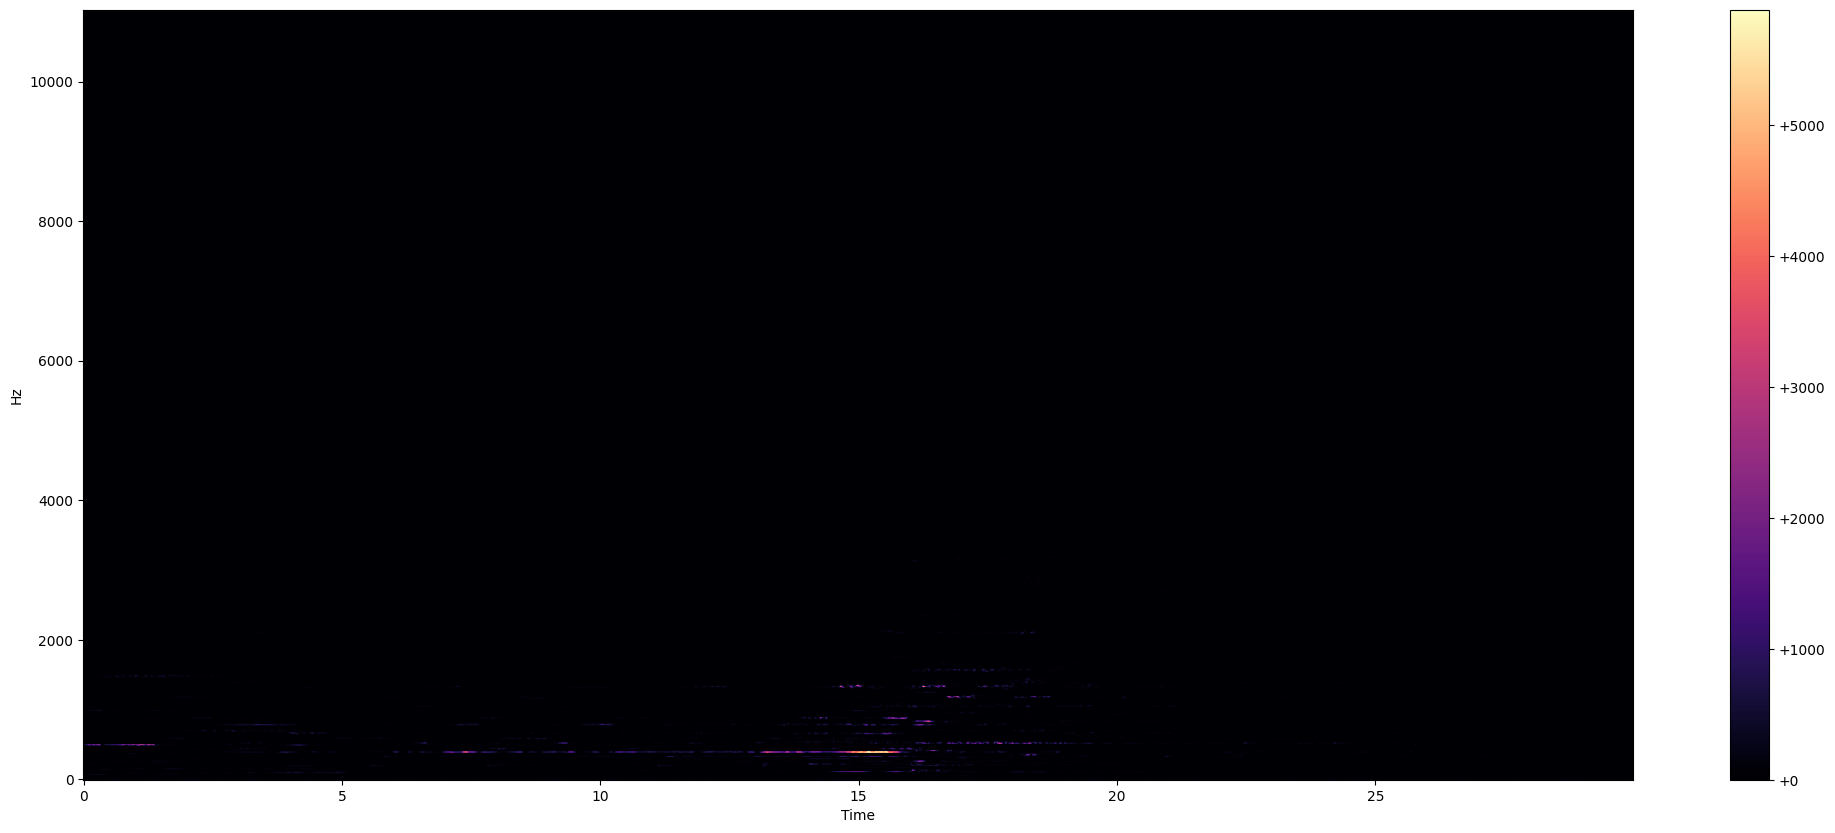

In [29]:
plot_spectogram(Y_debussy,sr,HOP_SIZE,y_axis="linear")

### Logarithmic Amplitude

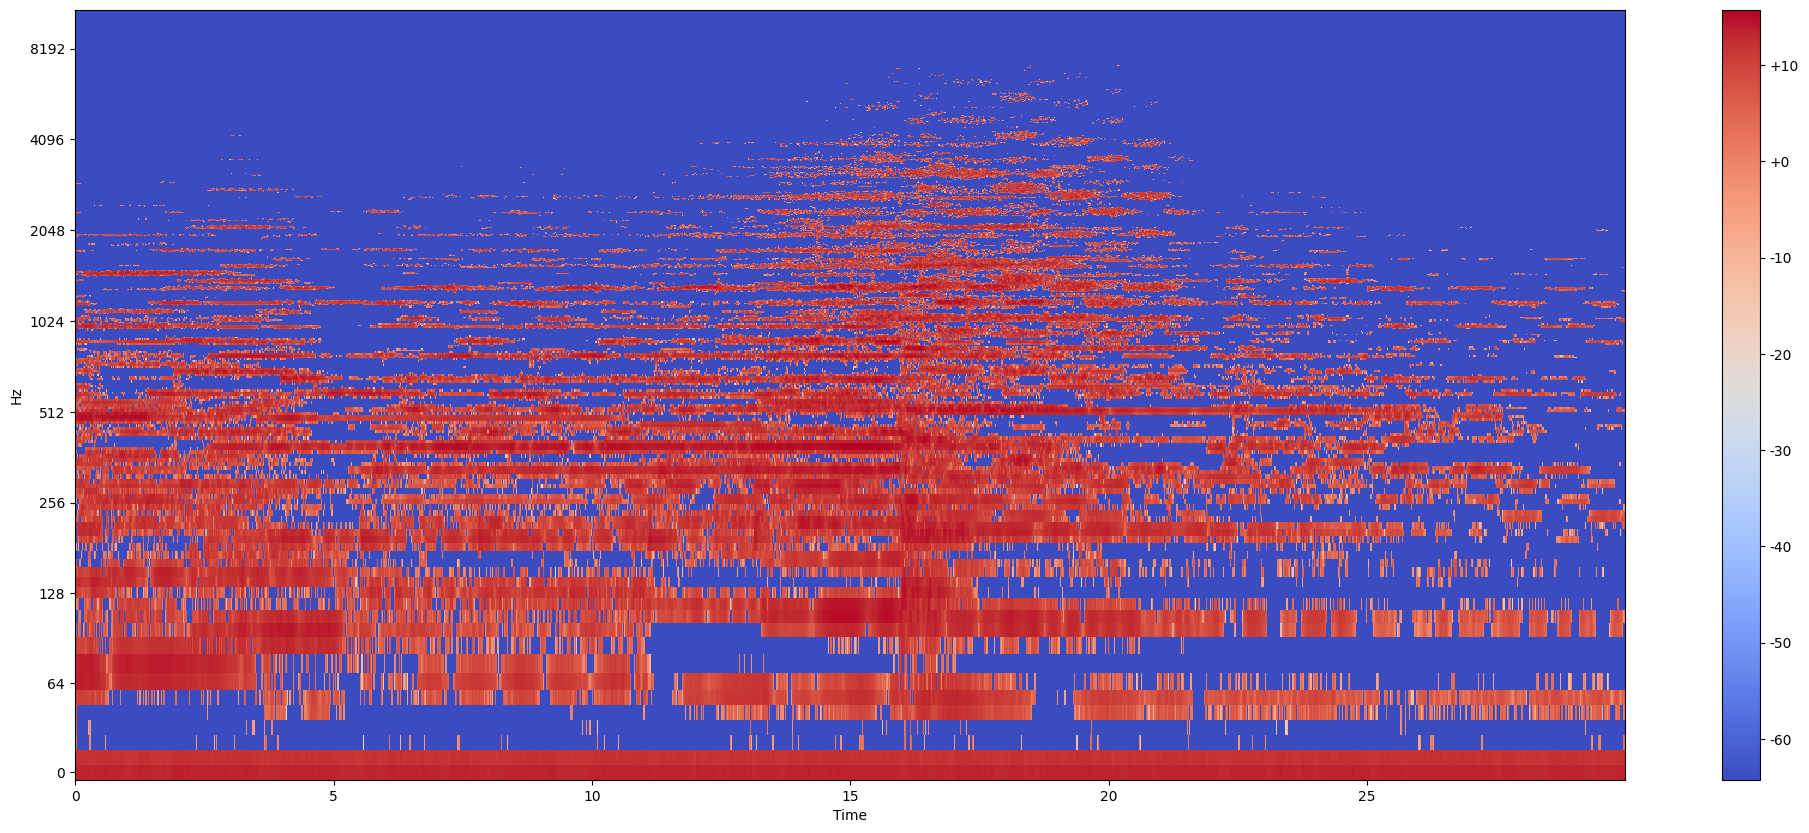

In [33]:
Ydb_debussy = librosa.power_to_db(Y_debussy)
plot_spectogram(Ydb_debussy,sr,HOP_SIZE,y_axis="log")

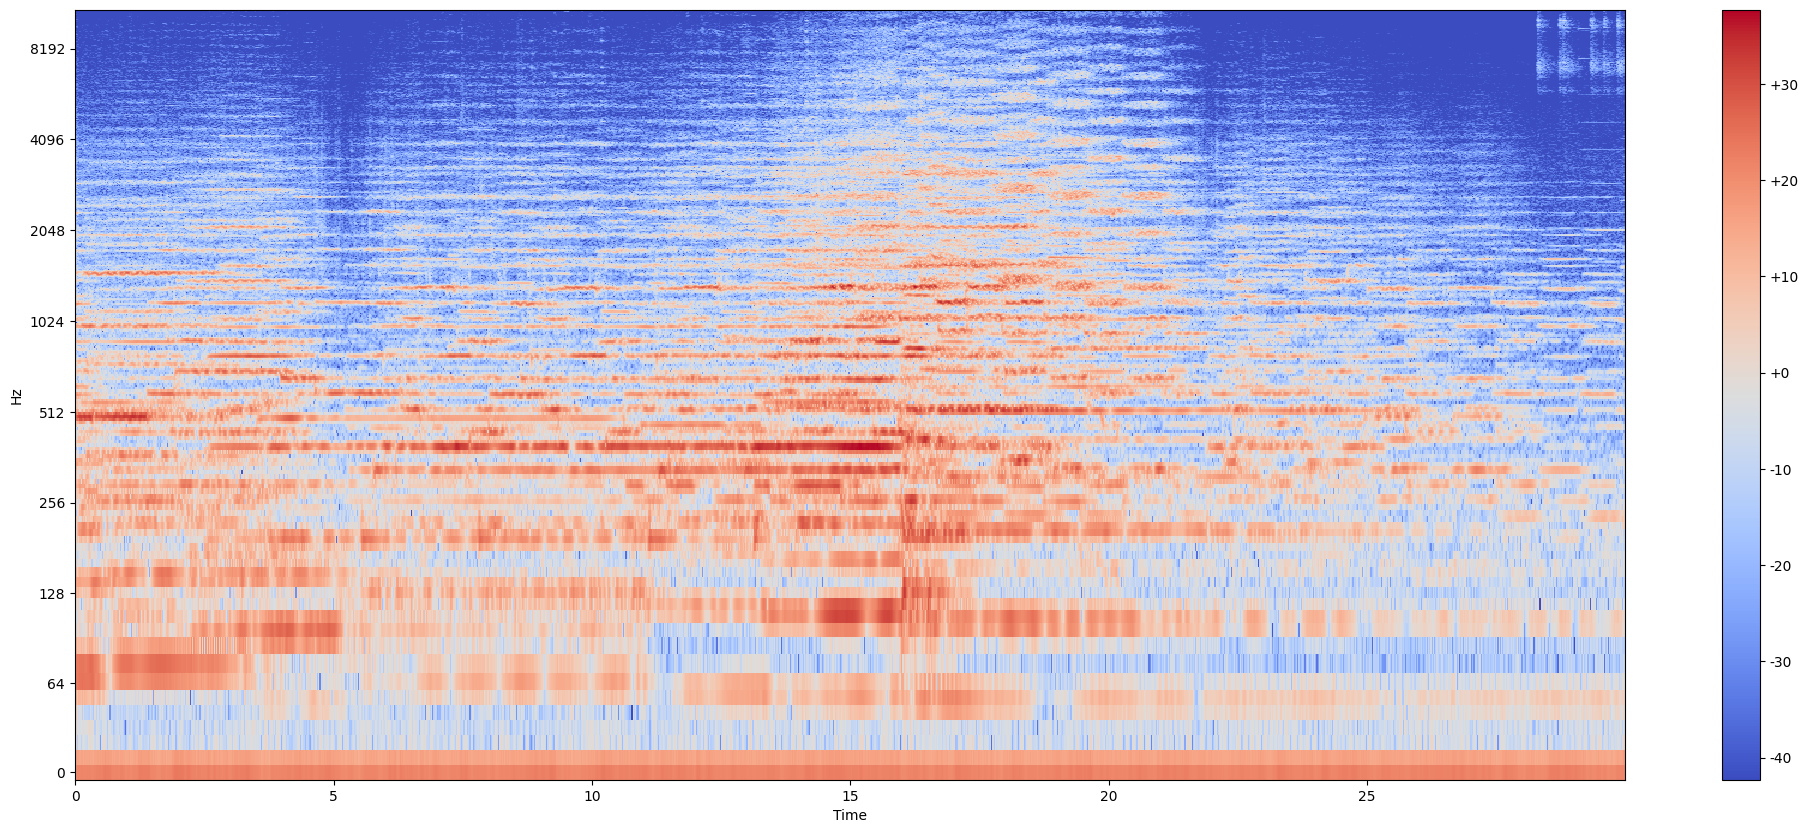

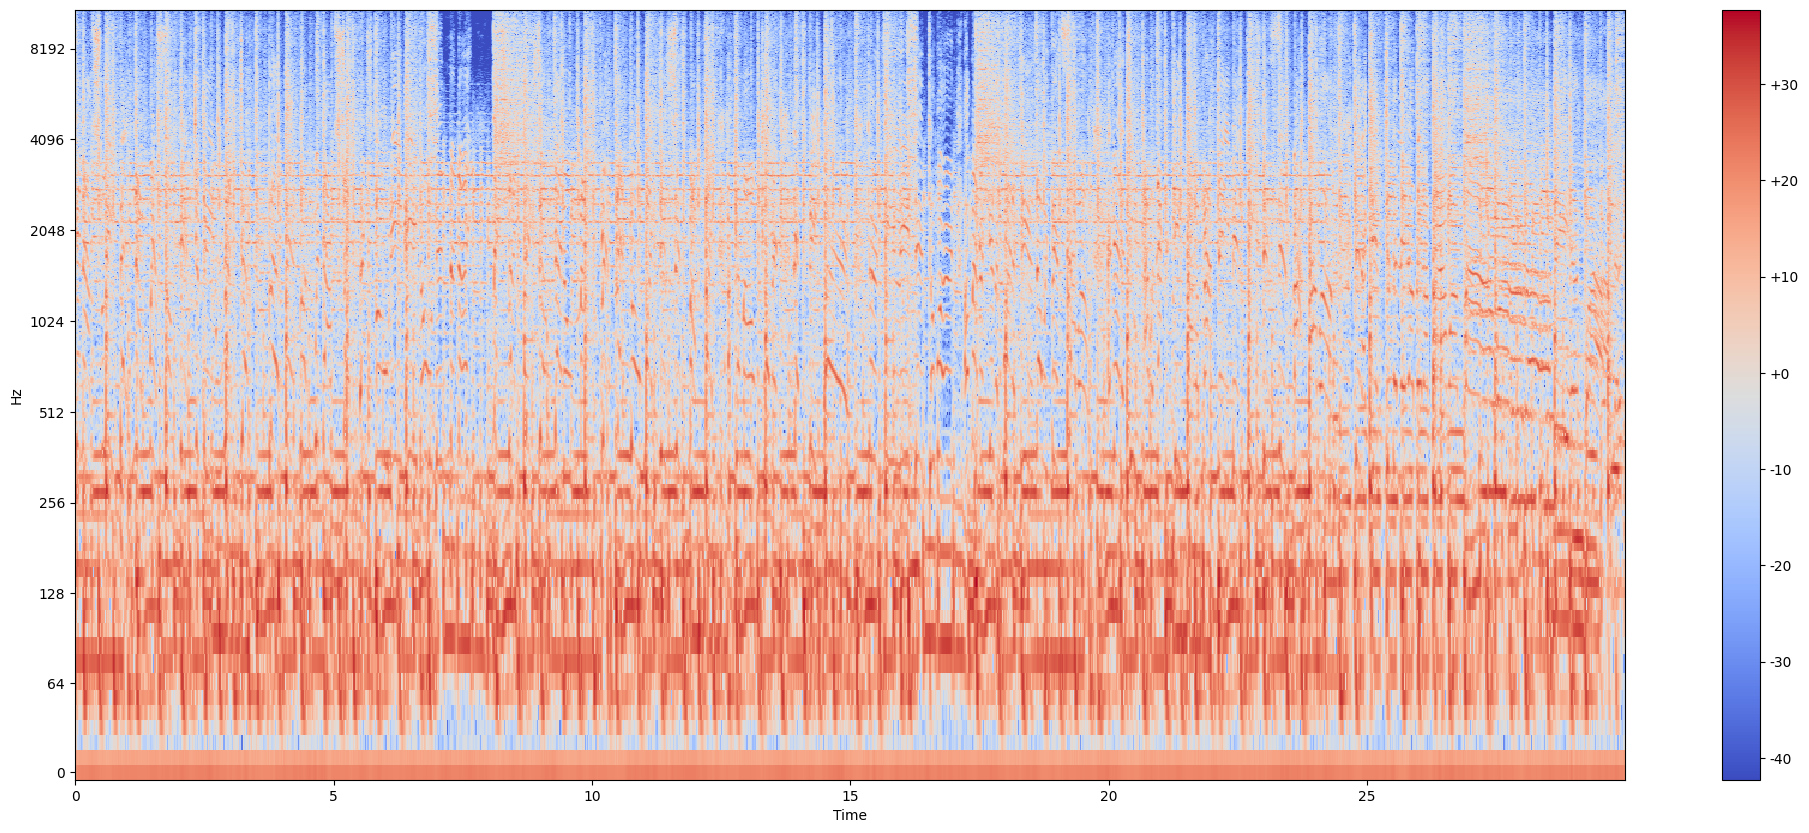

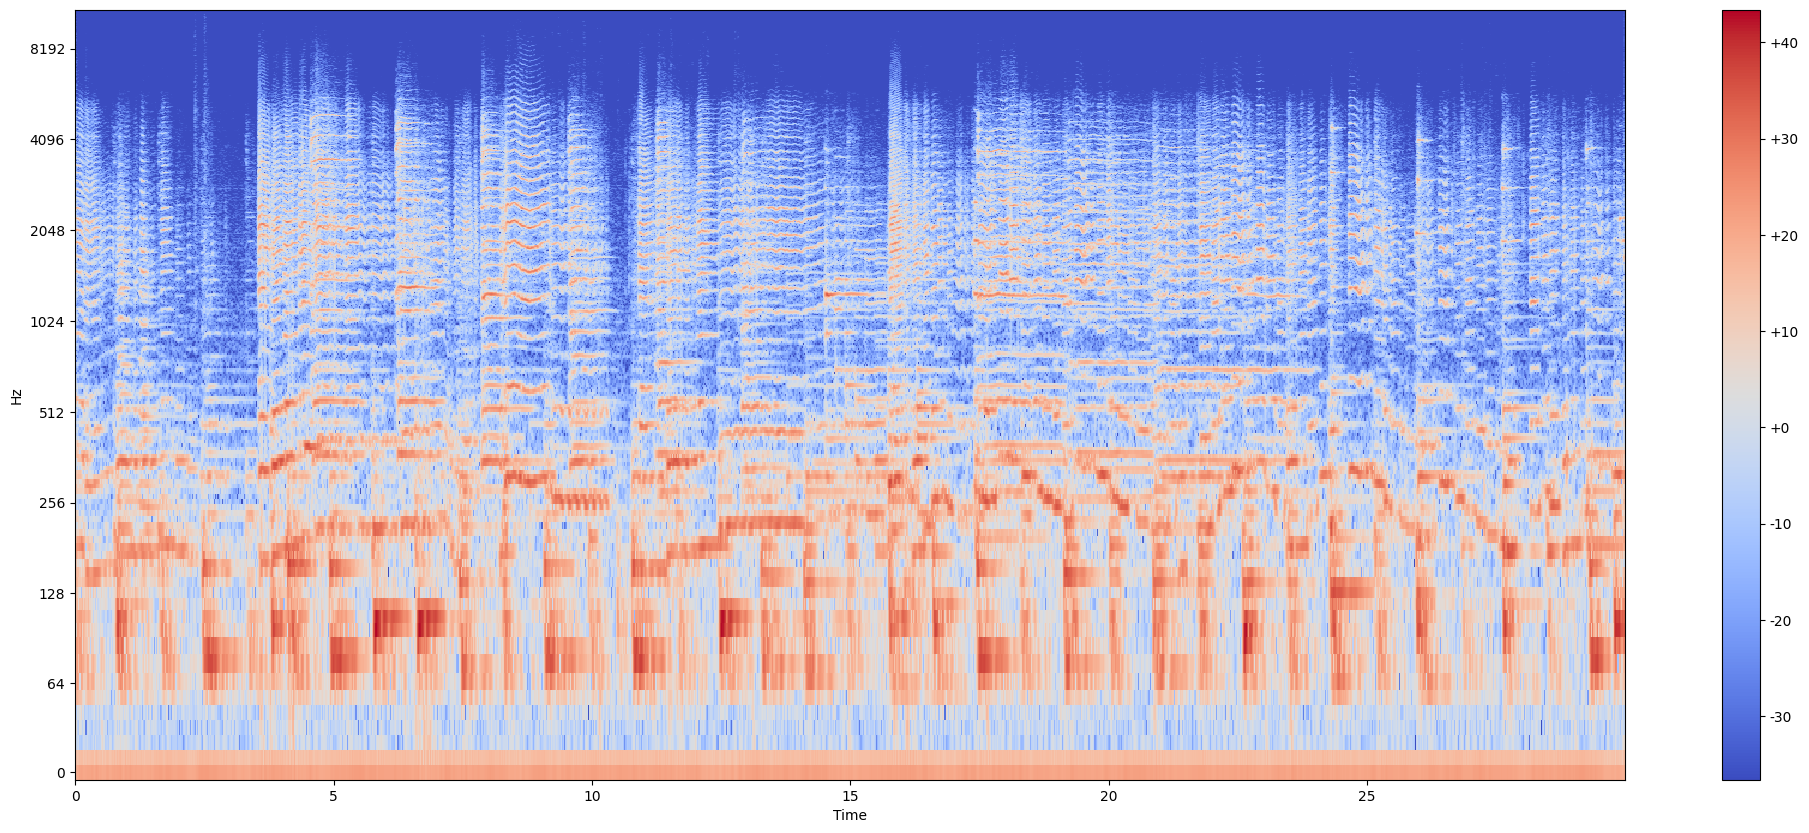

In [32]:
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot) ** 2)
Y_duke = librosa.power_to_db(np.abs(S_duke) ** 2)

plot_spectogram(Y_debussy, sr, HOP_SIZE, y_axis="log")
plot_spectogram(Y_redhot, sr, HOP_SIZE, y_axis="log")
plot_spectogram(Y_duke, sr, HOP_SIZE, y_axis="log")